### Linear Regression (Single Variable)
### Prediction of per capital income in 2027 in Canada

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model

In [2]:
file_path= r"\\w2016dc\home\praktikant\Downloads\canada_per_capita_income.csv"

In [3]:
df= pd.read_csv(file_path)

In [4]:
df.head(5)

,year,per capita income (US$)
0,1970,3399.299037
1,1971,3768.297935
2,1972,4251.175484
3,1973,4804.463248
4,1974,5576.514583


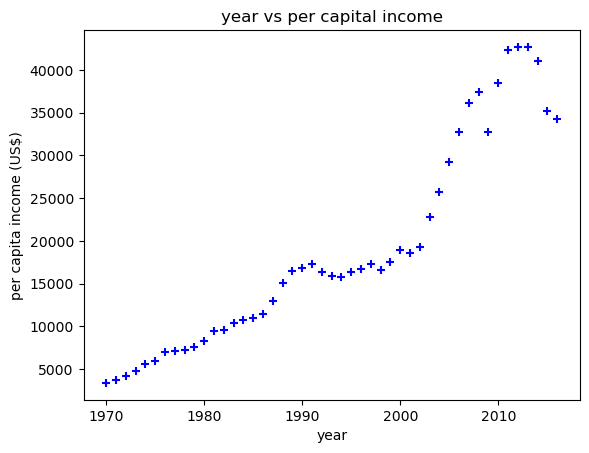

In [5]:
%matplotlib inline
plt.scatter(df['year'], df['per capita income (US$)'], color='blue',marker='+')
plt.xlabel('year')
plt.ylabel('per capita income (US$)')
plt.title('year vs per capital income')
plt.show()

In [6]:
reg= linear_model.LinearRegression()
reg.fit(df[["year"]],df["per capita income (US$)"])

LinearRegression()

In [7]:
predicted_income = reg.predict(pd.DataFrame([[2027]], columns=["year"]))

In [8]:
predicted_income

array([47087.94962098])

### Linear Regression (multiple variable)
### Home Price Prediction

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model

In [10]:
file_path=r"\\w2016dc\home\praktikant\Downloads\houseprice.csv"

In [11]:
df= pd.read_csv(file_path)

In [12]:
df

,area,bedrooms,age,price
0,2600,3.0,20,550000
1,3000,4.0,15,565000
2,3200,NaN,18,610000
3,3600,3.0,30,595000
4,4000,5.0,8,760000
5,4100,6.0,8,810000


In [13]:
df.bedrooms.median()

4.0

In [14]:
df.bedrooms.fillna(4.0)

0    3.0
1    4.0
2    4.0
3    3.0
4    5.0
5    6.0
Name: bedrooms, dtype: float64

In [15]:
df.bedrooms=df.bedrooms.fillna(4.0)

In [16]:
df

,area,bedrooms,age,price
0,2600,3.0,20,550000
1,3000,4.0,15,565000
2,3200,4.0,18,610000
3,3600,3.0,30,595000
4,4000,5.0,8,760000
5,4100,6.0,8,810000


In [17]:
reg=linear_model.LinearRegression()
reg.fit(df[['area','bedrooms','age']],df.price)

LinearRegression()

In [18]:
reg.coef_

array([  112.06244194, 23388.88007794, -3231.71790863])

In [19]:
reg.intercept_

221323.00186540408

In [20]:
112*3000+23388.88*3+-3231.71*40+221323

498221.24

In [21]:
predicted_price = reg.predict(pd.DataFrame([[2500,4,5]], columns=["area", "bedrooms","age"]))

In [22]:
predicted_price

array([578876.03748933])

### Linear Regression (multiple variable)
### Hiring salary prediction

In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model
from word2number import w2n

In [24]:
file_path= r"\\w2016dc\home\praktikant\Downloads\hiring.csv"

In [25]:
df=pd.read_csv(file_path)

In [26]:
df

,experience,test_score(out of 10),interview_score(out of 10),salary($)
0,NaN,8.0,9,50000
1,NaN,8.0,6,45000
2,five,6.0,7,60000
3,two,10.0,10,65000
4,seven,9.0,6,70000
5,three,7.0,10,62000
6,ten,NaN,7,72000
7,eleven,7.0,8,80000


In [27]:
df.experience=df.experience.fillna('zero')

In [28]:
df

,experience,test_score(out of 10),interview_score(out of 10),salary($)
0,zero,8.0,9,50000
1,zero,8.0,6,45000
2,five,6.0,7,60000
3,two,10.0,10,65000
4,seven,9.0,6,70000
5,three,7.0,10,62000
6,ten,NaN,7,72000
7,eleven,7.0,8,80000


In [29]:
df.experience=df.experience.apply(w2n.word_to_num)

In [30]:
df

,experience,test_score(out of 10),interview_score(out of 10),salary($)
0,0,8.0,9,50000
1,0,8.0,6,45000
2,5,6.0,7,60000
3,2,10.0,10,65000
4,7,9.0,6,70000
5,3,7.0,10,62000
6,10,NaN,7,72000
7,11,7.0,8,80000


In [31]:
import math
median_test_score = math.floor(df['test_score(out of 10)'].mean())
median_test_score

7

In [33]:
df['test_score(out of 10)']= df['test_score(out of 10)'].fillna(median_test_score)

In [34]:
df

,experience,test_score(out of 10),interview_score(out of 10),salary($)
0,0,8.0,9,50000
1,0,8.0,6,45000
2,5,6.0,7,60000
3,2,10.0,10,65000
4,7,9.0,6,70000
5,3,7.0,10,62000
6,10,7.0,7,72000
7,11,7.0,8,80000


In [43]:
reg=linear_model.LinearRegression()
reg.fit(df[['experience','test_score(out of 10)','interview_score(out of 10)']],df['salary($)'])

LinearRegression()

In [46]:
predicted_salary= reg.predict(pd.DataFrame([[2,9,6]], columns=['experience','test_score(out of 10)','interview_score(out of 10)']))

In [47]:
predicted_salary

array([53713.86677124])

In [48]:
predicted_salary= reg.predict(pd.DataFrame([[12,10,10]], columns=['experience','test_score(out of 10)','interview_score(out of 10)']))

In [49]:
predicted_salary

array([93747.79628651])